<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        Python pour 📊 Data Science
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Mini-Projet: Bitcoin Trading 🤖 Bot.
       </h2>
</center>

<center id="Intro-section">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Introduction 📖
        </h2>
</center>

<span style="color:grey; font-size:1.2em">Dans le cadre de nos études de la matière Python pour Data Science nous sommes amenez à réaliser Ce projet qui vise a <b>réaliser un bot de trading sous python</b>. Le but final est de réaliser un  <b>gain maximal</b> sur une période donnée (année 2021 par exemple).
</span>

<div id="dataset">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Jeu de données
        </h3>
</div>


<span style="color:grey; font-size:1.2em"><b>Données à utiliser: Bitcoin</b><br>
Ces données doivent être subdivisées en deux parties: une partie pour l'apprentissage du modèle utilisé dans le trading (par exemple un historique des données de l'année 2020). Une deuxième partie pour la validation (backtesting) du modèle (données 2021 par exemple).</span>


<center id="data">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Collecte de données 📂
        </h2>
</center>

<h4 style="color:grey"> Importation de bibliothèques </h4>

In [1]:
# importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import requests, json

In [42]:
import pandas_datareader as pdr

In [44]:
df_ticker = pdr.DataReader('BTC-USD', 'yahoo', '2014-09-01', '2022-10-28')

In [49]:
df_ticker

High           Low          Open         Close  \
Date                                                                 
2014-09-17    468.174011    452.421997    465.864014    457.334015   
2014-09-18    456.859985    413.104004    456.859985    424.440002   
2014-09-19    427.834991    384.532013    424.102997    394.795990   
2014-09-20    423.295990    389.882996    394.673004    408.903992   
2014-09-21    412.425995    393.181000    408.084991    398.821014   
...                  ...           ...           ...           ...   
2022-10-25  20348.412109  19261.447266  19344.964844  20095.857422   
2022-10-26  20938.134766  20076.117188  20092.236328  20770.441406   
2022-10-27  20854.044922  20255.373047  20772.802734  20285.835938   
2022-10-28  20724.980469  20086.068359  20287.957031  20595.351562   
2022-10-29  20988.394531  20566.484375  20595.103516  20818.476562   

                 Volume     Adj Close  
Date                                   
2014-09-17     21056800    457.334015  
2014-09-18     34483200    424.440002  
2014-09-19     37919700    394.795990  
2014-09-20     36863600    408.903992  
2014-09-21     26580100    398.821014  
...                 ...           ...  
2022-10-25  47761524910  20095.857422  
2022-10-26  58895950537  20770.441406  
2022-10-27  49625110402  20285.835938  
2022-10-28  43994715910  20595.351562  
2022-10-29  40369840645  20818.476562  

[2965 rows x 6 columns]

### EDA function

In [2]:
def EDA(df):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape of the data :' + '\033[0m')
    print(df.shape, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'All columns from the dataframe :' + '\033[0m')
    print(df.columns, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatpes and Missing values:' + '\033[0m')
    print(df.info(), 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summary statistics for the data :' + '\033[0m')
    print(df.describe(include='all'), 
          '\n------------------------------------------------------------------------------------\n')
    
        
    print('\033[1m' + 'Memory used by the data :' + '\033[0m')
    print(df.memory_usage(), 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df.duplicated().sum())
          


<div id="yfinance">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  La Bibliothèque yfinance
        </h3>
</div>

<span style="color:grey; font-size:1.2em"><b>yfinance</b> est une bibliothèque open source populaire qui offre un accès aux données financières disponibles sur <b>Yahoo Finance</b>.</span>

In [3]:
data = yf.Ticker("BTC-USD")
yf_df = data.history(start='2014-09-01', end='2022-10-28')

In [4]:
yf_df

Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2022-10-23  19207.734375  19646.652344  19124.197266  19567.007812   
2022-10-24  19567.769531  19589.125000  19206.324219  19345.572266   
2022-10-25  19344.964844  20348.412109  19261.447266  20095.857422   
2022-10-26  20092.236328  20938.134766  20076.117188  20770.441406   
2022-10-27  20772.802734  20854.044922  20255.373047  20285.835938   

                 Volume  Dividends  Stock Splits  
Date                                              
2014-09-17     21056800          0             0  
2014-09-18     34483200          0             0  
2014-09-19     37919700          0             0  
2014-09-20     36863600          0             0  
2014-09-21     26580100          0             0  
...                 ...        ...           ...  
2022-10-23  22128794335          0             0  
2022-10-24  30202235805          0             0  
2022-10-25  47761524910          0             0  
2022-10-26  58895950537          0             0  
2022-10-27  49625110402          0             0  

[2963 rows x 7 columns]

<center id="Analysis-section">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Analyses et Transformations 🔎
        </h2>
</center>

<div id="eda">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Exploration de données
        </h3>
</div>

In [5]:
#  ignorer les avertissements
import warnings

warnings.filterwarnings("ignore")


In [6]:
# Dataset d'amazon
BTC_data = yf_df

<h4 style="color:grey"> Explorant notre jeu de données </h4>

In [7]:
EDA(BTC_data)

EXPLORATORY DATA ANALYSIS :

Shape of the data :
(2963, 7) 
------------------------------------------------------------------------------------

All columns from the dataframe :
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object') 
------------------------------------------------------------------------------------

Datatpes and Missing values:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2963 entries, 2014-09-17 to 2022-10-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2963 non-null   float64
 1   High          2963 non-null   float64
 2   Low           2963 non-null   float64
 3   Close         2963 non-null   float64
 4   Volume        2963 non-null   int64  
 5   Dividends     2963 non-null   int64  
 6   Stock Splits  2963 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 185.2 KB
None 
-----------------------------------------

<span style="color:grey; font-size:1.2em">Les données n'ont pas de <b>valeurs manquantes</b>, nous n'effectuerons donc pas un <b>nettoyage des données.</b> </span>

<div id="trans">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Transformation de données
        </h3>
</div>


<span style="color:grey; font-size:1.2em">Nous définissons la colonne <b>Date</b> comme index de notre Dataframe.</span>  

In [8]:
#BTC_Data = BTC_data.set_index('Date', drop=True)

In [9]:
BTC_Data=BTC_data.copy()

<span style="color:grey; font-size:1.2em">Nous ne conservons que les données après le <b>01/01/2020</b> comme demandé.</span>  


In [10]:
BTC_Data = BTC_Data[BTC_Data.index>='2020-01-01']

In [11]:
BTC_Data=BTC_Data.drop(['Dividends','Stock Splits'],axis=1)

<span style="color:grey; font-size:1.2em">Explorant donc le nouveau Dataframe.</span>  


In [12]:
EDA(BTC_Data)

EXPLORATORY DATA ANALYSIS :

Shape of the data :
(1031, 5) 
------------------------------------------------------------------------------------

All columns from the dataframe :
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object') 
------------------------------------------------------------------------------------

Datatpes and Missing values:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1031 entries, 2020-01-01 to 2022-10-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1031 non-null   float64
 1   High    1031 non-null   float64
 2   Low     1031 non-null   float64
 3   Close   1031 non-null   float64
 4   Volume  1031 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 48.3 KB
None 
------------------------------------------------------------------------------------

Summary statistics for the data :
               Open          High           Low         Close        Volume
cou

<span style="color:grey; font-size:1.2em">Traçons la valeur du <b>"Close"</b> du Bitcoin</span>  

In [13]:
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

In [14]:
# visualiser la valeur "Close"

btc_trace = go.Figure(data=[go.Scatter(x=BTC_Data.index, y=BTC_Data['Close'], name= 'Close')])

btc_trace.update_layout(
title = {
    'text': 'BTC for Close Value',
    'y':0.90,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'} , 
template="plotly_white")

btc_trace.show()

<span style="color:grey; font-size:1.2em">Traçons la valeur du <b>"Volume"</b> du Bitcoin</span>  

In [15]:
# visualiser la valeur "Volume"

btc_trace = go.Figure(data=[go.Scatter(x=BTC_Data.index, y=BTC_Data['Volume'], name= 'Volume')])

btc_trace.update_layout(
title = {
    'text': 'BTC for Volume Value',
    'y':0.90,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'} , 
template="plotly_white")

btc_trace.show()


<span style="color:grey; font-size:1.2em">Traçons <b>la matrice de corrélation</b> pour sélectionner les colonnes appropriées.</span>

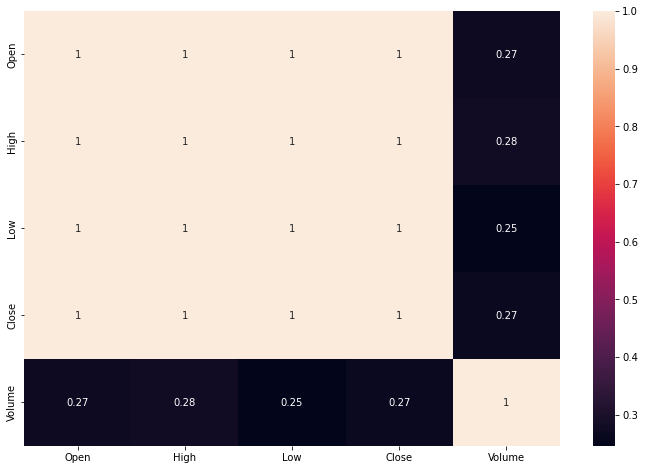

In [16]:
# the correlation matrix 
mat = BTC_Data.corr()
plt.figure(figsize=(12, 8))
sb.heatmap(mat,annot=True)

plt.show()

<h4 style="color:grey"> CANDELSTICK CHARTS</h4>

In [29]:
import cufflinks as cf
cf.go_offline()

In [40]:
def candelstick_chart(data,title):
    candlestick = go.Figure(data = [go.Candlestick(x =data.index, 
                                               open = data[('Open')], 
                                               high = data[('High')], 
                                               low = data[('Low')], 
                                               close = data[('Close')],
                                               #increasing_line_color= 'cyan', 
                                               #decreasing_line_color= 'gray'
                                                )])
    candlestick.update_xaxes(title_text = 'Time',
                             rangeslider_visible = False)

    candlestick.update_layout(
    title = {
        'text': '{:} Candelstick Chart'.format(title),
        'y':0.90,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'} , 
    template="plotly_white")

    candlestick.update_yaxes(title_text = 'Prix en USD', ticksuffix = '$')
    return candlestick

In [64]:
btc_plot = candelstick_chart(BTC_Data[-90:],title = "Bitcoin(BTC)")
btc_plot.show()

<h4 style="color:grey">OHLC CHARTS</h4>

In [65]:
def ohlc_chart(data,title):
    ohlc = go.Figure(data = [go.Ohlc(x =data.index, 
                                               open = data[('Open')], 
                                               high = data[('High')], 
                                               low = data[('Low')], 
                                               close = data[('Close')])])
    ohlc.update_xaxes(title_text = 'Time',
                             rangeslider_visible = False)

    ohlc.update_layout(
    title = {
        'text': '{:} OHLC Chart'.format(title),
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        template="plotly_white")

    ohlc.update_yaxes(title_text = 'Prix en USD', ticksuffix = '$')
    return ohlc

In [66]:
ohlc_chart(BTC_Data[:-200], title = "Bitcoin")

In [67]:
def vol_traded(data ,title,color):
    area = px.area(data_frame=data,
               x = data.index ,
               y = "Volume",
               markers = True)
    area.update_traces(line_color=color)
    area.update_xaxes(
        title_text = 'Time',
        rangeslider_visible = True)
    area.update_yaxes(title_text = 'Number of trades every minute')
    area.update_layout(showlegend = True, xaxis_rangeslider_visible=False,
        title = {
            'text': '{:} Volume Traded'.format(title),
            'y':0.94,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        template="plotly_white")
    return area

In [68]:
vol_traded(BTC_Data[-90:], "Bitcoin",color = "blue")

<center id="ml-basic">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Approache avec les modèles de base du Machine Learning 🛠️
        </h2>
</center>

<div id="data-prep">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Pré-traitement
        </h3>
</div>

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

<h4 style="color:grey">Diviser les données</h4>

<span style="color:grey; font-size:1.2em">Dataframe du prix de close du Bitcoin.</span>

In [70]:
closedf = BTC_data[['Close']]
print("Forme du dataframe close", closedf.shape)

Forme du dataframe close (2963, 1)


In [71]:
closedf = closedf[closedf.index> '2020-09-13']
close_stock = closedf.copy()
print("Données totales pour la prédiction : ",closedf.shape[0])

Données totales pour la prédiction :  774


<span style="color:grey; font-size:1.2em">Normalizing close price value.</span>

In [72]:
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(774, 1)



<span style="color:grey; font-size:1.2em">Maintenant on va diviser notre jeu de données <b>70%</b> pour l'entraînement et <b>30%</b> pour le test.</span>

In [73]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:]

In [74]:
print("la taille des données d'entraînement est: ",train_data.shape[0])
print("la taille d'échantillon du test est: ",test_data.shape[0])

la taille des données d'entraînement est:  541
la taille d'échantillon du test est:  233


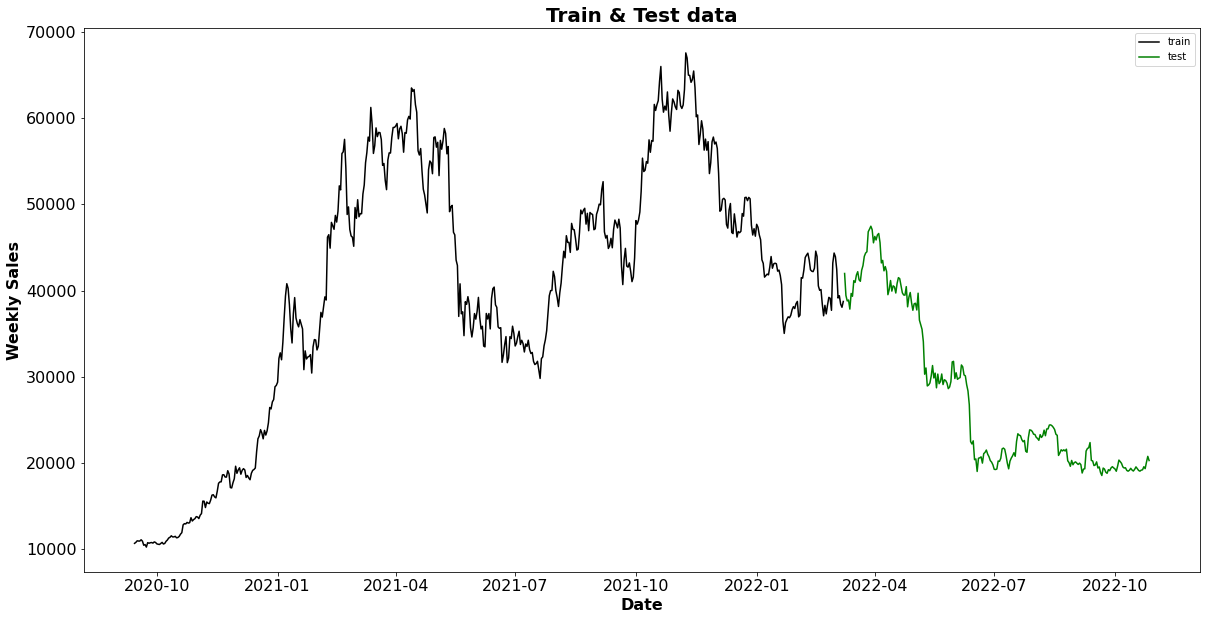

In [75]:
fig, ax = plt.subplots(figsize=(20, 10))
sb.lineplot(x = close_stock.index[:train_data.shape[0]], y = close_stock['Close'][:train_data.shape[0]], color = 'black')
sb.lineplot(x = close_stock.index[train_data.shape[0]:], y = close_stock['Close'][train_data.shape[0]:], color = 'green')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))


<span style="color:grey; font-size:1.2em">Convertir un tableau de valeurs en une matrice de jeu de données.</span>

In [76]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   #i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [77]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (525, 15)
y_train:  (525,)
X_test:  (217, 15)
y_test (217,)


<div id="pre-processing">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Construction des modèles
        </h3>
</div>

In [78]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 


<span style="color:grey; font-size:1.2em">Nous allons choisir un ensemble de modèles pour commencer</span>  


In [79]:
LR=LinearRegression()

XGBoost = XGBRegressor(n_estimators=100, learning_rate=0.3,
                     max_delta_step=0, max_depth=6, n_jobs=4,
                     num_parallel_tree=1, random_state=0)

RFR = RandomForestRegressor(max_depth=1000, n_jobs=4)
models = {"Linear Regression":LR, "XGBoost Regressor":XGBoost, "Random Forest Regressor":RFR}

In [80]:
def train_model(model_name):
    models[model_name].fit(X_train,y_train)
    predictions = models[model_name].predict(X_test)
    print("\n---------------"+model+"---------------\n")
    print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
    print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions)))+"\n")
    

In [81]:
for model in models:
    train_model(model)


---------------Linear Regression---------------

Mean Absolute Error - MAE : 0.011859868908969295
Root Mean squared Error - RMSE : 0.016615319234858934


---------------XGBoost Regressor---------------

Mean Absolute Error - MAE : 0.05564400696958704
Root Mean squared Error - RMSE : 0.07130726286974633


---------------Random Forest Regressor---------------

Mean Absolute Error - MAE : 0.0381541610764858
Root Mean squared Error - RMSE : 0.04801138739106497



In [82]:
def predict(model_name):
    train_predict=models[model_name].predict(X_train)
    test_predict=models[model_name].predict(X_test)

    # Transform back to original form
    train_predict = train_predict.reshape(-1,1)
    test_predict = test_predict.reshape(-1,1)

    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)
    
    return train_predict, test_predict

<div id="model-building">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Evaluation des modèles
        </h3>
</div>

<span style="color:grey; font-size:1.2em">On va <b>évaluer</b> nos modèles à la fois sur les données d'entraînement et de test et d'obtenir <b>scores</b> de précision.</span>

In [83]:
from itertools import cycle

In [84]:
def eval(model):
    train_predict, test_predict = predict(model)
    # shift train predictions for plotting
    look_back=time_step
    trainPredictPlot = np.empty_like(closedf)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(closedf)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
    
    original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
    original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 
    

    
    names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

    plotdf = pd.DataFrame({'date': close_stock.index,
                           'original_close': close_stock['Close'],
                          'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                          'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

    fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                              plotdf['test_predicted_close']],
                  labels={'value':'Close price','date': 'Date'})
    fig.update_layout(title_text='Prediction avec le '+model,
                      plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()
    
    ## Variance Regression Score
    print("\n\nTrain data explained variance regression score:", 
          explained_variance_score(original_ytrain, train_predict))
    print("Test data explained variance regression score:", 
          explained_variance_score(original_ytest, test_predict))

    ## R square score for regression
    print("\nTrain data R2 score:", r2_score(original_ytrain, train_predict))
    print("Test data R2 score:", r2_score(original_ytest, test_predict))
    


In [85]:
for model in models:
    eval(model) 
    



Train data explained variance regression score: 0.9866070673754329
Test data explained variance regression score: 0.9888463088187402

Train data R2 score: 0.9866070673754329
Test data R2 score: 0.98762438642921




Train data explained variance regression score: 0.9999812463448474
Test data explained variance regression score: 0.8853922586568532

Train data R2 score: 0.9999812463448462
Test data R2 score: 0.7720618847343307




Train data explained variance regression score: 0.9976895615815066
Test data explained variance regression score: 0.9477689227200115

Train data R2 score: 0.997688831461581
Test data R2 score: 0.8966672774153204


<span style="color:grey; font-size:1.2em">Comme on peut le voir, les approches ml de base obtiennent des résultats respectables, mais nous n'avons obtenu un modèle qui fonctionne très bien sur toutes les données</span>

<center id="deep-learning">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Approache avec le Deep Learning 🧠
        </h2>
</center>

<div id="pre-processing">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Pré-traitement
        </h3>
</div>

<span style="color:grey; font-size:1.2em">"Reshape" l'entrée pour qu'elle soit <b>[samples, time steps, features]</b> , ce qui est requis pour LSTM.</span>  


In [86]:
# reshape input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (525, 15, 1)
X_test:  (217, 15, 1)


<div id="LSTM">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  LSTM
        </h3>
</div>

<span style="color:grey; font-size:1.2em">Après avoir appliqué le modèle de régression linéaire à nos données, nous allons essayer d'implémenter un modèle de deep learning : LSTM qui est très adapté à ce cas.</span>

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

<span style="color:grey; font-size:1.2em">Maintenant nous créons un nouveau modèle `Sequential()` puis nous ajoutons<b> 2 couches:</b> <br> une couche avec l'activation <b>relu</b> avec 10 unités et la deuxieme avec une unité.</span>

In [88]:
LSTM_model=Sequential()
LSTM_model.add(LSTM(100,input_shape=(None,1), return_sequences=True,activation="relu"))
LSTM_model.add(LSTM(100, return_sequences=True))
LSTM_model.add(LSTM(100, return_sequences=False))
LSTM_model.add(Dense(25))
LSTM_model.add(Dense(1))

<span style="color:grey; font-size:1.2em">On choisit les paramètres de la méthode `.compile()`. <br>pour le paramètre <b>loss</b> est <i>mean_squared_error</i> afin de calculer la perte d'entropie croisée entre les deux "Labels" et les prédictions. pour <b>optimizer</b> on choisit: <i>adam</i> et bien sûr <i>accuracy</i> comme <b>metrics</b> </span>

In [89]:
LSTM_model.compile(loss="mean_squared_error",optimizer="adam")

<span style="color:grey; font-size:1.2em">Voyons un <b>summary<b> des paramètres de notre modèle</span>

In [90]:
LSTM_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, None, 100)         40800     
                                                                 
 lstm_7 (LSTM)               (None, None, 100)         80400     
                                                                 
 lstm_8 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 204,151
Trainable params: 204,151
Non-trainable params: 0
_________________________________________________________________


In [91]:
history = LSTM_model.fit( X_train, y_train,
                         validation_data=(X_test,y_test),
                         epochs=100, batch_size=32,
                         verbose=True)

Epoch 1/100
17/17 [==============================] - 22s 530ms/step - loss: 0.0599 - val_loss: 0.0215
Epoch 2/100
17/17 [==============================] - 2s 87ms/step - loss: 0.0110 - val_loss: 0.0078
Epoch 3/100
17/17 [==============================] - 2s 99ms/step - loss: 0.0067 - val_loss: 0.0030
Epoch 4/100
17/17 [==============================] - 1s 81ms/step - loss: 0.0057 - val_loss: 0.0034
Epoch 5/100
17/17 [==============================] - 2s 93ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 6/100
17/17 [==============================] - 1s 81ms/step - loss: 0.0051 - val_loss: 0.0041
Epoch 7/100
17/17 [==============================] - 2s 91ms/step - loss: 0.0049 - val_loss: 0.0065
Epoch 8/100
17/17 [==============================] - 2s 126ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 9/100
17/17 [==============================] - 2s 93ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 10/100
17/17 [==============================] - 2s 91ms/step - loss: 0.0045 - val_loss: 0.0

Epoch 81/100
17/17 [==============================] - 2s 101ms/step - loss: 0.0010 - val_loss: 4.2822e-04
Epoch 82/100
17/17 [==============================] - 2s 104ms/step - loss: 9.8566e-04 - val_loss: 3.6295e-04
Epoch 83/100
17/17 [==============================] - 2s 92ms/step - loss: 0.0010 - val_loss: 4.1817e-04
Epoch 84/100
17/17 [==============================] - 2s 104ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 85/100
17/17 [==============================] - 1s 88ms/step - loss: 0.0010 - val_loss: 9.2479e-04
Epoch 86/100
17/17 [==============================] - 2s 95ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 87/100
17/17 [==============================] - 1s 85ms/step - loss: 0.0012 - val_loss: 4.0566e-04
Epoch 88/100
17/17 [==============================] - 2s 95ms/step - loss: 9.1869e-04 - val_loss: 3.3291e-04
Epoch 89/100
17/17 [==============================] - 1s 83ms/step - loss: 0.0011 - val_loss: 4.5552e-04
Epoch 90/100
17/17 [==============================] 

In [95]:
predictions = LSTM_model.predict(X_test)
print("\n---------------LSTM---------------\n")
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions)))+"\n")

7/7 [==============================] - 0s 19ms/step

---------------LSTM---------------

Mean Absolute Error - MAE : 0.017275512288892864
Root Mean squared Error - RMSE : 0.021395346145421795



In [96]:
X_test

array([[[0.55367034],
        [0.50926287],
        [0.4980542 ],
        ...,
        [0.53788319],
        [0.56022789],
        [0.56954649]],

       [[0.50926287],
        [0.4980542 ],
        [0.49995646],
        ...,
        [0.56022789],
        [0.56954649],
        [0.58817812]],

       [[0.4980542 ],
        [0.49995646],
        [0.48156261],
        ...,
        [0.56954649],
        [0.58817812],
        [0.59494351]],

       ...,

       [[0.16050482],
        [0.1551849 ],
        [0.15361362],
        ...,
        [0.15572544],
        [0.15634862],
        [0.16260846]],

       [[0.1551849 ],
        [0.15361362],
        [0.15546335],
        ...,
        [0.15634862],
        [0.16260846],
        [0.15874536]],

       [[0.15361362],
        [0.15546335],
        [0.15939664],
        ...,
        [0.16260846],
        [0.15874536],
        [0.17183462]]])

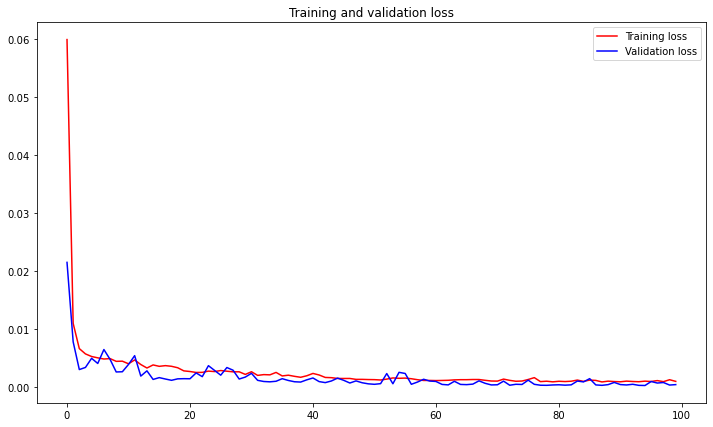

In [97]:
# Plotting Loss vs Validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize=(12, 7))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

<span style="color:grey; font-size:1.2em">Faisons la prédiction pour vérifer les mesures de performance.</span>

In [98]:
train_predict=LSTM_model.predict(X_train)
test_predict=LSTM_model.predict(X_test)
train_predict.shape, test_predict.shape

# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

7/7 [==============================] - 0s 21ms/step


<div id="eval">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Evaluation
        </h3>
</div>

<span style="color:grey; font-size:1.2em">C'est temps d' <b>évaluer</b> notre modèle à la fois sur les données d'entraînement et de test et d'obtenir <b>scores</b> de précision.</span>

In [99]:
## Variance Regression Score
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9858083758164127
Test data explained variance regression score: 0.9857131892402571


In [100]:
## R square score for regression
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9854373305110394
Test data R2 score: 0.9794794895885048


In [103]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock.index,
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Prediction avec LSTM',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<span style="color:grey; font-size:1.2em">Comme nous pouvons le voir, nous avons atteint un meilleur score avec un réseau de neurones artificiels pour nos données du test qui provient de différentes sources</span>

<center id="model-eval">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Approache avec les séries chronologiques 📈
        </h2>
</center>

<div id="decomposition">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Décomposition
        </h3>
</div>

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning

warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore', category=HessianInversionWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [58]:
tickerSymbol = 'BTC-USD'
data = yf.Ticker(tickerSymbol)

In [59]:
prices = data.history(start='2020-01-01', end='2022-10-28').Close
returns = prices.pct_change().dropna()

In [60]:
returns

Date
2020-01-01    0.000914
2020-01-02   -0.029819
2020-01-03    0.051452
2020-01-04    0.008955
2020-01-05    0.000089
                ...   
2022-10-23    0.018680
2022-10-24   -0.011317
2022-10-25    0.038783
2022-10-26    0.033568
2022-10-27   -0.023331
Name: Close, Length: 1031, dtype: float64

#### Visualisation

<span style="color:grey; font-size:1.2em">À quoi ressemble ma série chronologique ?</span>

In [61]:
fig = px.line(prices)

fig.update_layout(title='BTC/USD Price',
                   xaxis_title='Time',
                   yaxis_title='Price',
                   plot_bgcolor='white')

fig.show()

In [62]:

fig = px.line(returns)

fig.update_layout(title='BTC/USD Price',
                   xaxis_title='Time',
                   yaxis_title='Returns',
                   plot_bgcolor='white')

fig.show()

#### Transformation

<span style="color:grey; font-size:1.2em">Lorsque une série chronologique a une croissance exponentielle, il est généralement judicieux d'utiliser le logarithme pour rendre l'intrigue plus linéaire.</span>

In [63]:
log_df = np.log(prices) #log df

fig = px.line(log_df, x=log_df.index, y="Close")

fig.update_layout(title='BTC/USD Log Price Representation',
                   xaxis_title='Years',
                   yaxis_title='LOG Price',
                   plot_bgcolor='white')

fig.show()

#### Stationarisation

<span style="color:grey; font-size:1.2em">Les modèles des séries chronologiques fonctionnent mieux avec série stationnaire !
<b>Essayons de différencier la version linéarisée de la série chronologique.</b>
<br>
&emsp;&emsp;👉 Une série temporelle stationnaire est une série dont les propriétés ne dépendent pas du moment auquel la série est observée.</span>

Text(0.5, 1.0, 'Différenciation de 2ème ordre')

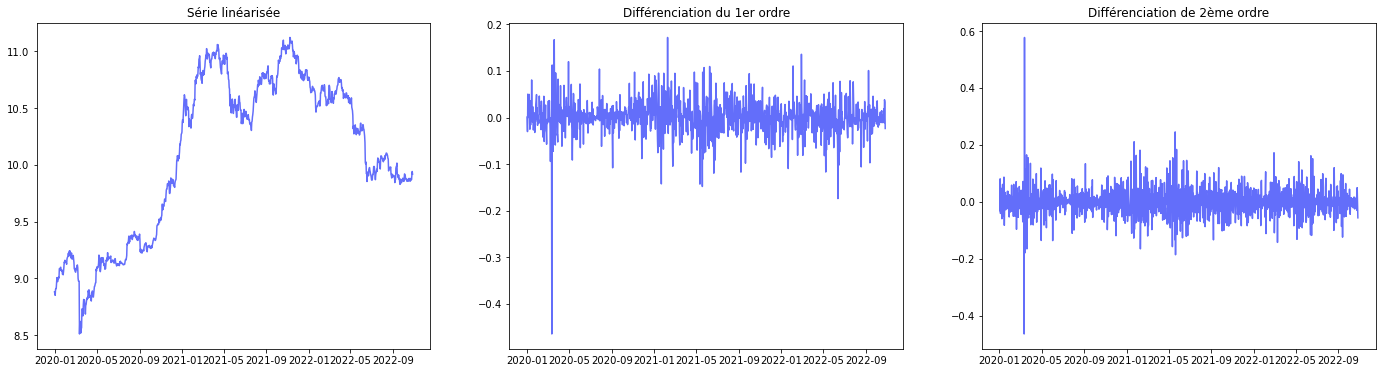

In [64]:
# Faisons la différence et regardons les ACF
fig, axes = plt.subplots(1, 3,figsize=(24,6))

plt.style.use('seaborn-deep')

axes[0].plot(log_df, color="#636EFA");
axes[0].set_title('Série linéarisée')
             
# 1ère différenciation
y_diff = log_df.diff().dropna()
axes[1].plot(y_diff, color="#636EFA");
axes[1].set_title('Différenciation du 1er ordre')

# 2e différenciation
y_diff_diff = log_df.diff().diff().dropna()
axes[2].plot(y_diff_diff, color="#636EFA");
axes[2].set_title('Différenciation de 2ème ordre')

<span style="color:grey; font-size:1.2em">👉 Vérifiez la stationnarité à l'aide du test Augmented Dickey-Fuller :
<br>
     &emsp;&emsp;❌ Hypothèse nulle : La stationnarité <b>n'existe pas</b> dans la série.
<br>
      &emsp;&emsp; ❗  Hypothèse alternative : la stationnarité <b>existe</b> dans la série.
</span>

In [65]:
from statsmodels.tsa.stattools import adfuller

In [66]:
adfuller(log_df)

(-1.593862823847228,
 0.4866756821414233,
 9,
 1022,
 {'1%': -3.4367646777960137,
  '5%': -2.8643721733775553,
  '10%': -2.568277973123571},
 -3667.19431197649)

In [67]:
# check with ADF Test for stationarity

y_diff= log_df.diff().dropna()
y_diff_diff= log_df.diff().diff().dropna()

print('p-value zero-diff: ', adfuller(log_df)[1])
print('p-value first-diff: ', adfuller(y_diff)[1])
print('p-value second-diff: ', adfuller(y_diff_diff)[1])

p-value zero-diff:  0.4866756821414233
p-value first-diff:  2.6342914346680022e-18
p-value second-diff:  2.3702624907331406e-20


**Remarque:**
- Une p-value (<0,05) suggère une preuve solide contre H0, donc vous **rejetez l'hypothèse nulle**. 👉 Stationnaire
- Une p-value (> 0,05) indique une preuve faible contre H0, donc vous **ne parvenez pas à rejeter l'hypothèse nulle**. 👉 Non stationnaire

<div id="forcasting">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Prévision
        </h3>
</div>

#### ARIMA

<span style="color:grey; font-size:1.2em">Trouvons les hyperparamètres p et q</span>

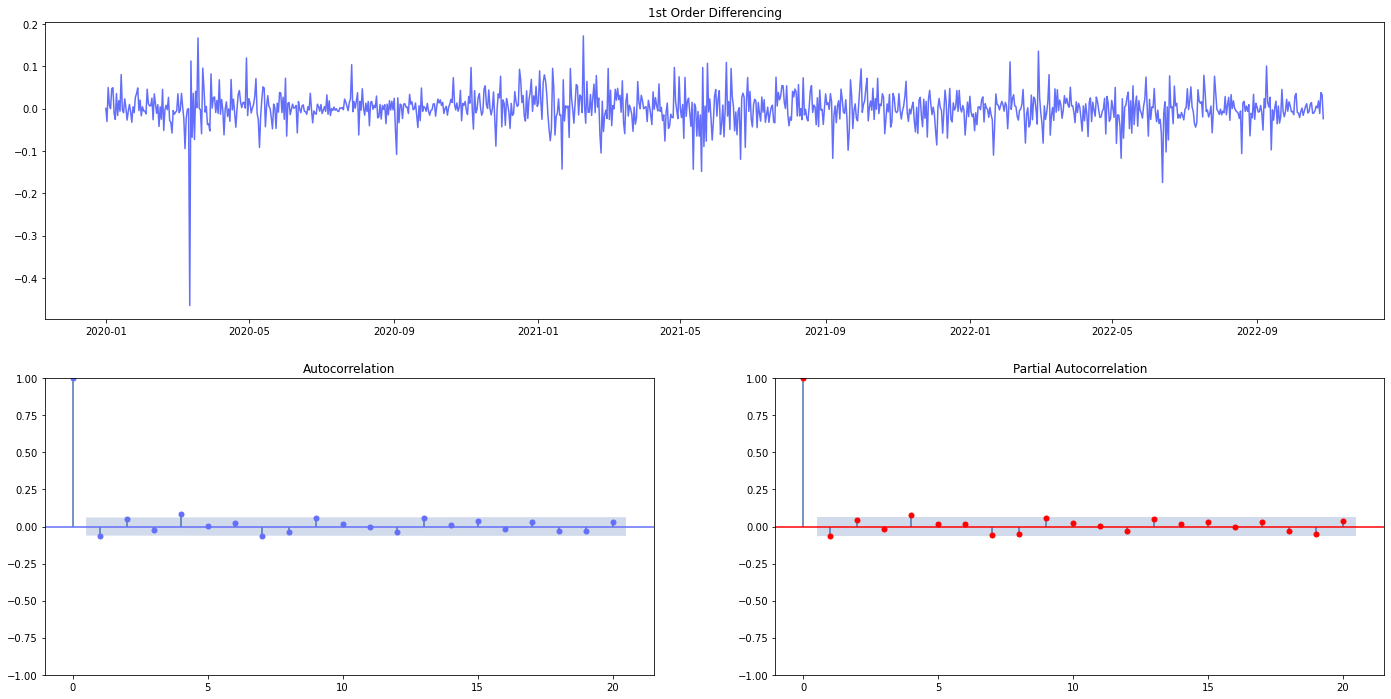

In [68]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#figure setup
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(2,1,1)
ax1.set_title('1st Order Differencing')
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

#plots
ax1.plot(y_diff, color="#636EFA")
plot_acf(y_diff, lags=20, ax=ax2, color="#636EFA");
plot_pacf(y_diff, lags=20, ax=ax3, color='r', method='ywm')
plt.show()

<span style="color:grey; font-size:1.2em">Nous utilisons le diagramme <b>PACF</b> pour calculer la valeur de <b>p</b><br>Nous utilisons le graphique <b>ACF</b> pour calculer la valeur de <b>q</b>
</span>

#### Training the ARIMA

In [69]:
log_df

Date
2019-12-31    8.880947
2020-01-01    8.881861
2020-01-02    8.851588
2020-01-03    8.901759
2020-01-04    8.910674
                ...   
2022-10-23    9.881600
2022-10-24    9.870219
2022-10-25    9.908269
2022-10-26    9.941286
2022-10-27    9.917678
Name: Close, Length: 1032, dtype: float64

In [71]:
#from statsmodels.tsa.arima_model import ARIMA #statsmodels 0.11
from statsmodels.tsa.arima.model import ARIMA #statsmodels >=0.12

y= log_df #just to be precise

arima = ARIMA(y, order=(1,1,1))
#arima = arima.fit(disp = 0 )
arima = arima.fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1032
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1880.603
Date:                Sat, 29 Oct 2022   AIC                          -3755.205
Time:                        23:04:14   BIC                          -3740.390
Sample:                    12-31-2019   HQIC                         -3749.583
                         - 10-27-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7377      0.133     -5.535      0.000      -0.999      -0.477
ma.L1          0.6729      0.147      4.569      0.000       0.384       0.962
sigma2         0.0015   2.05e-05     74.476      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             18904.94
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -1.70
Prob(H) (two-sided):                  0.01   Kurtosis:                        23.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
#!pip install pmdarima
import pmdarima as pm
smodel = pm.auto_arima(y,
                       start_p =0, max_p = 5,
                       start_d = 0, max_d = 5,
                       start_q = 0, max_q = 5,
                       seasonal = False,
                       trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-2963.307, Time=0.38 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-3341.137, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.72 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-2965.307, Time=0.42 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-3446.257, Time=1.39 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-3548.916, Time=0.73 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-3584.390, Time=0.59 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=-3610.134, Time=1.71 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=-3705.592, Time=5.52 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-3731.587, Time=3.62 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-3723.849, Time=3.25 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=-3725.421, Time=4.02 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-3731.885, Time=6.74 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.61 sec
 ARIMA(3,2,3)(0,0,0)[0] interce

#### Diviser notre série

In [73]:
train_size=0.7 #70% of data

index = round(train_size*log_df.shape[0])

y_train = log_df.iloc[:index] #first 70% rows for training set
y_test = log_df.iloc[index:] #last 30% rows for test set
n_train=len(y_train)

#results from autoarima
best_order = smodel.order # best (p,d,q)

In [74]:
print("la taille des données d'entraînement est: ",y_train.shape[0])
print("la taille d'échantillon du test est: ",y_test.shape[0])

la taille des données d'entraînement est:  722
la taille d'échantillon du test est:  310


In [75]:
y_train

Date
2019-12-31     8.880947
2020-01-01     8.881861
2020-01-02     8.851588
2020-01-03     8.901759
2020-01-04     8.910674
                ...    
2021-12-17    10.740781
2021-12-18    10.754680
2021-12-19    10.751650
2021-12-20    10.755352
2021-12-21    10.798281
Name: Close, Length: 722, dtype: float64

<span style="color:grey; font-size:1.2em">Commençons le "training" notre modèle</span>

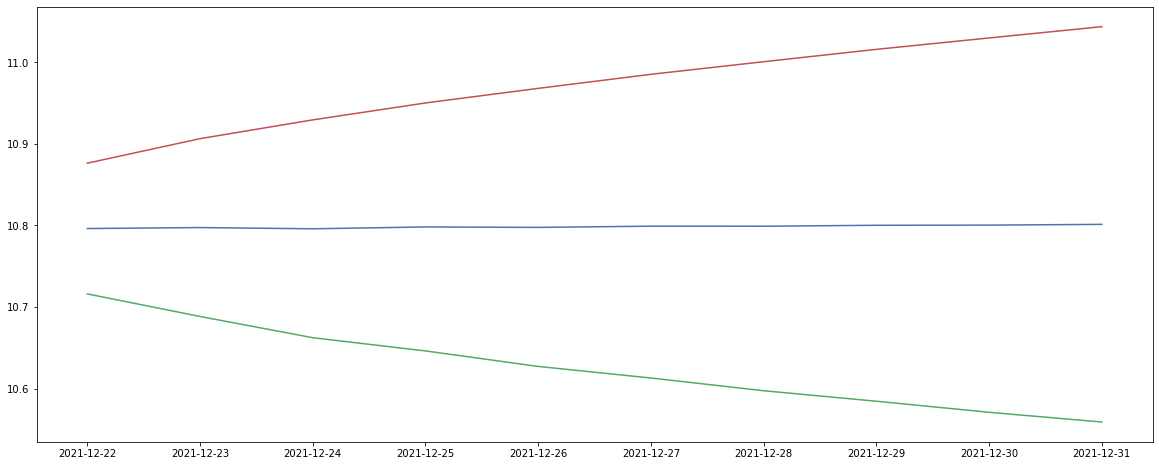

In [76]:
plt.figure(figsize=(20,8))
plt.plot(ARIMA(y_train,order=best_order).fit().get_forecast(10).predicted_mean)
plt.plot(ARIMA(y_train,order=best_order).fit().get_forecast(10).conf_int())

In [77]:
arima_df = ARIMA(y_train,order=best_order).fit().get_forecast(10).conf_int()
arima_df['pred'] = ARIMA(y_train,order=best_order).fit().get_forecast(10).predicted_mean
arima_df

lower Close  upper Close       pred
2021-12-22    10.716052    10.876397  10.796225
2021-12-23    10.688380    10.906486  10.797433
2021-12-24    10.662329    10.929535  10.795932
2021-12-25    10.646117    10.950282  10.798199
2021-12-26    10.627097    10.968182  10.797639
2021-12-27    10.612906    10.985415  10.799161
2021-12-28    10.597287    11.000867  10.799077
2021-12-29    10.584424    11.016038  10.800231
2021-12-30    10.570835    11.030035  10.800435
2021-12-31    10.558898    11.043837  10.801368

In [78]:
def walk_forward_validation(n_train, test):
    # create dataframe to store the outcome
    result = pd.DataFrame(columns=['forecast', 'lower_interval', 'upper_interval'])
    # predict one point at a time
    for i in range(len(test)):
        # define train set
        train_ = log_df.iloc[:n_train+i].copy()
        # train the model
        arima = ARIMA(endog = train_, order=best_order).fit(method_kwargs={"warn_convergence": False})
        # get the forecast
        results = arima.get_forecast(1, alpha=0.05)
        # central
        result.loc[i, 'forecast'] = results.predicted_mean[0]
        # lower interval
        result.loc[i, 'lower_interval'] = results.conf_int().iloc[0, 0]
        # upper interval
        result.loc[i, 'upper_interval'] = results.conf_int().iloc[0, 1]
    # join with test dataframe
    result.index=test.index
    result = result.apply(pd.to_numeric)
    test = test.to_frame()
    print(type(test))
    return test.join(result)

result = walk_forward_validation(n_train, y_test)

<class 'pandas.core.frame.DataFrame'>


In [79]:
result

Close   forecast  lower_interval  upper_interval
Date                                                            
2021-12-22  10.791965  10.796225       10.716052       10.876397
2021-12-23  10.835347  10.792386       10.712147       10.872625
2021-12-24  10.836088  10.830240       10.750004       10.910477
2021-12-25  10.828339  10.838687       10.758462       10.918913
2021-12-26  10.835839  10.826460       10.746846       10.906074
...               ...        ...             ...             ...
2022-10-23   9.881600   9.861040        9.784664        9.937417
2022-10-24   9.870219   9.877880        9.801319        9.954440
2022-10-25   9.908269   9.869663        9.793124        9.946202
2022-10-26   9.941286   9.902613        9.826047        9.979178
2022-10-27   9.917678   9.939726        9.863160       10.016293

[310 rows x 4 columns]

<div id="validation">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Validation
        </h3>
</div>

In [80]:
# baseline = tomorrows prediction is todays price
result['base'] = result['Close'].shift()
result['base'].iloc[0] = y_train.to_frame().Close[-1]
result.apply(lambda x: np.exp(x).astype('float16')).tail(5) #exp for visualization only

Close  forecast  lower_interval  upper_interval     base
Date                                                                  
2022-10-23  19568.0   19168.0         17760.0         20688.0  19216.0
2022-10-24  19344.0   19488.0         18064.0         21040.0  19568.0
2022-10-25  20096.0   19328.0         17904.0         20880.0  19344.0
2022-10-26  20768.0   19984.0         18512.0         21568.0  20096.0
2022-10-27  20288.0   20736.0         19216.0         22384.0  20768.0

In [81]:
def plot_forecast(fc, train, test, upper=None, lower=None):
    # shift train predictions for plotting
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    names = cycle(['Training data','Actual close price','Forecast close price'])


    plotdf = pd.DataFrame({'date': log_df.index,
                           'training': train,
                           'actual': test,
                           'Forecast': fc_series})

    fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['training'],plotdf['actual'],
                                              plotdf['Forecast']],
                  labels={'value':'Close price','date': 'Date'})
    fig.update_layout(title_text='Prediction avec ARIMA (1, 1, 1)',
                      plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()

In [82]:
plot_forecast(result.forecast, y_train, y_test, np.array(result.upper_interval), np.array(result.lower_interval))

<span style="color:grey; font-size:1.2em">Évaluons à l'aide de mesures de performances.</span>

In [100]:
# define a function to get MAPE using y_pred, y_true
def get_mape(y_true, y_pred):
    '''takes y_true, y_pred (pandas series)
    returns mean absolute percentage error'''
    mape = 100*((y_true - y_pred)/y_true).abs().mean()
    return round(mape, 2)

# define a function to get MASE using y_pred, y_true
def get_mase(y_true, y_pred, y_train):
    '''takes y_true, y_pred (pandas series)
    returns mean absolute scaled error'''
    mae_test = (y_true - y_pred).abs().mean()
    y_t = y_train
    y_t_1 = y_train.shift(-1)
    mae_train = (y_t - y_t_1).abs().mean()
    return round(mae_test/mae_train, 2)

In [101]:
# MAPE and MASE 
print('mape model:', get_mape(result.Close, result.forecast))
print('mape baseline:', get_mape(result.Close, result.base))
print('')
print('mase model:', get_mase(result.Close, result.forecast, y_train.to_frame().Close))
print('mase baseline', get_mase(result.Close, result.base, y_train.to_frame().Close))

mape model: 0.23
mape baseline: 0.23

mase model: 0.88
mase baseline 0.86


#### Recomposer la série chronologique initiale

In [85]:
forecast_recons = np.exp(result.forecast)
train_recons = np.exp(y_train)
test_recons = np.exp(y_test)
lower_recons = np.array(np.exp(result.lower_interval))
upper_recons = np.array(np.exp(result.upper_interval))

# plt 
plot_forecast(forecast_recons, train_recons, test_recons, upper_recons, lower_recons)

<span style="color:grey; font-size:1.2em">Encore une fois, nous avons atteint un meilleur score avec des prévision de séries chronologiques en utilisant <b>ARIMA</b></span>

<center id="Bot">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Trading 🤖 Bot
        </h2>
</center>`

<div id="simulation">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Création d'une Simulation
        </h3>
</div>



In [86]:
from tqdm import tqdm
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
import warnings
from statsmodels.tsa.arima.model import ARIMA


#in practice do not supress these warnings, they carry important information about the status of your model
warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore', category=HessianInversionWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

#model 


LSTM_model=Sequential()
LSTM_model.add(LSTM(100,input_shape=(None,1), return_sequences=True,activation="relu"))
LSTM_model.add(LSTM(100, return_sequences=True))
LSTM_model.add(LSTM(100, return_sequences=False))
LSTM_model.add(Dense(25))
LSTM_model.add(Dense(1))
LSTM_model.compile(loss="mean_squared_error",optimizer="adam")


prices = data.history(start='2021-04-01', end='2021-10-01').Close
returns = prices.pct_change().dropna()

In [94]:
returns

Date
2021-04-01    0.003004
2021-04-02    0.004882
2021-04-03   -0.029981
2021-04-04    0.020045
2021-04-05    0.005094
                ...   
2021-09-26    0.011516
2021-09-27   -0.022514
2021-09-28   -0.028440
2021-09-29    0.012912
2021-09-30    0.053568
Name: Close, Length: 183, dtype: float64

In [ ]:
history = LSTM_model.fit( X_train, y_train,
                         validation_data=(X_test,y_test),
                         epochs=100, batch_size=32,
                         verbose=True)

In [ ]:
arima_df = ARIMA(y_train,order=best_order).fit().get_forecast(10).conf_int()
arima_df['pred'] = ARIMA(y_train,order=best_order).fit().get_forecast(10).predicted_mean
arima_df

In [99]:
arima_df

lower Close  upper Close       pred
2021-12-22    10.716052    10.876397  10.796225
2021-12-23    10.688380    10.906486  10.797433
2021-12-24    10.662329    10.929535  10.795932
2021-12-25    10.646117    10.950282  10.798199
2021-12-26    10.627097    10.968182  10.797639
2021-12-27    10.612906    10.985415  10.799161
2021-12-28    10.597287    11.000867  10.799077
2021-12-29    10.584424    11.016038  10.800231
2021-12-30    10.570835    11.030035  10.800435
2021-12-31    10.558898    11.043837  10.801368

<span style="color:grey; font-size:1.2em">Simulez l'achat et la vente d'actions du Bitcoin en utilisant l'un des modèles que nous spécifierons</span>

In [87]:
def run_simulation(returns, prices, amt, order, thresh, verbose=False, plot=True):
    if type(order) == float:
        thresh = None
        
    curr_holding = False
    events_list = []
    init_amt = amt

    #go through dates
    for date, r in tqdm (returns.iloc[14:].items(), total=len(returns.iloc[14:])):
        #if you're currently holding the stock, sell it
        if curr_holding:
            sell_price = prices.loc[date]
            curr_holding=False
            ret = (sell_price-buy_price)/buy_price
            amt *= (1+ret)
            events_list.append(('s', date, ret))
            
            if verbose:
                print('Sold at $%s'%sell_price)
                print('Predicted Return: %s'%round(pred,4))
                print('Actual Return: %s'%(round(ret, 4)))
                print('=======================================')
            continue

        #get data til just before current date
        curr_data = returns[:date]
        
        if type(order) == tuple:
            try:
                #fit model
                model = ARIMA(curr_data, order=order).fit()
                #model = ARIMA(curr_data, order=order).fit()
                #get forecast
                pred = model.forecast()[0]
            
            except Exception as e:
                print(e)
                pred = thresh - 1



        #if you predict a high enough return and not holding, buy stock
        if (not curr_holding) and \
        ((type(order) == float and np.random.random() < order) 
         or (type(order) == tuple and pred > thresh)
         or (order == 'last' and curr_data[-1] > 0)):
            
            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s'%buy_price)
                
    if verbose:
        print('Total Amount: $%s'%round(amt,2))
        
    #graph
    if plot:
    
        plt.figure(figsize=(18,8))
        plt.plot(prices[14:])

        y_lims = (int(prices.min()*.95), int(prices.max()*1.05))
        shaded_y_lims = int(prices.min()*.5), int(prices.max()*1.5)

        for idx, event in enumerate(events_list):
            plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
            if event[0] == 's':
                color = 'green' if event[2] > 0 else 'red'
                plt.fill_betweenx(range(*shaded_y_lims), 
                                  event[1], events_list[idx-1][1], color=color, alpha=0.1)

        tot_return = round(100*(amt / init_amt - 1), 2)
        tot_return = str(tot_return) + '%'
        plt.title("%s Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s"%(tickerSymbol, thresh, round(amt,2), tot_return), fontsize=20)
        plt.ylim(*y_lims)
        plt.show()
    
    return amt

<div id="testing">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Tester Les Approaches
        </h3>
</div>




<span style="color:grey; font-size:1.2em">Juste pour le plaisir, nous allons commencer mais en suivant une approche <b>d'achat aléatoire</b>.</span>

100%|██████████| 169/169 [00:00<00:00, 3032.47it/s]


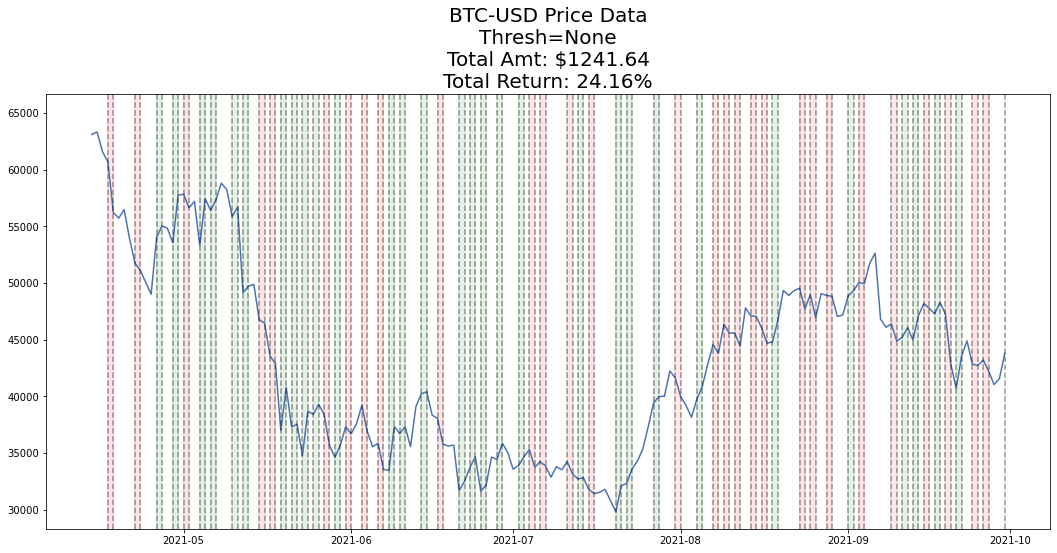

1241.6391939256343

In [88]:
run_simulation(returns, prices, 1000, 0.5, None, verbose=False)


<span style="color:grey; font-size:1.2em">Répétez la simulation d'achat aléatoire <b>1000 fois</b> pour vous assurer que nous serons toujours <b>sous la moyenne</b> de la somme d'argent <b>1000$</b> avec laquelle nous avons commencé.</span>

In [89]:
final_amts = [run_simulation(returns, prices, 1000, 0.5, None, verbose=False, plot=False) for _ in range(1000)]

100%|██████████| 169/169 [00:00<00:00, 5280.85it/s]


100%|██████████| 169/169 [00:00<00:00, 5281.79it/s]


100%|██████████| 169/169 [00:00<00:00, 3534.45it/s]


100%|██████████| 169/169 [00:00<00:00, 3378.18it/s]


Text(0.5, 1.0, 'Avg: $956.17\nSD: $284.65')

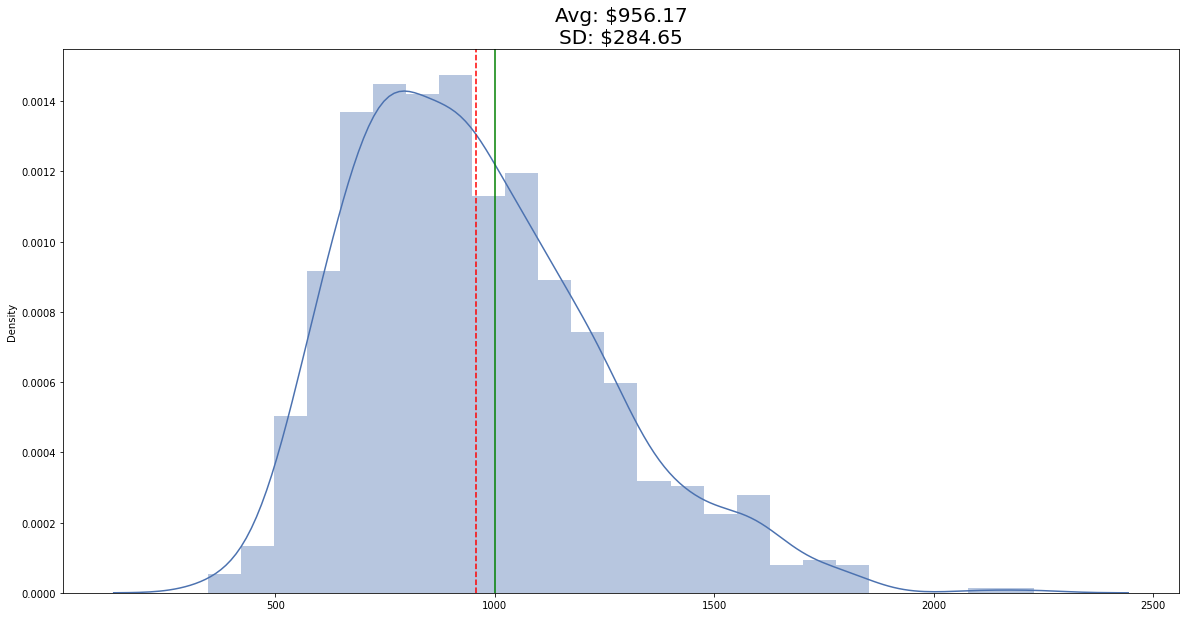

In [93]:
plt.figure(figsize=(20,10))
sb.distplot(final_amts)
plt.axvline(np.mean(final_amts), color='r', linestyle='--')
plt.axvline(1000, color='g')
plt.title('Avg: $%s\nSD: $%s'%(round(np.mean(final_amts),2), round(np.std(final_amts),2)), fontsize=20)


<h4 style="color:red; font-size:1.2em">Nous perdrons donc environ 5% de notre argent.</h4>

#### Technique: Si le dernier retour était positif, achetez

100%|██████████| 169/169 [00:00<00:00, 4392.73it/s]


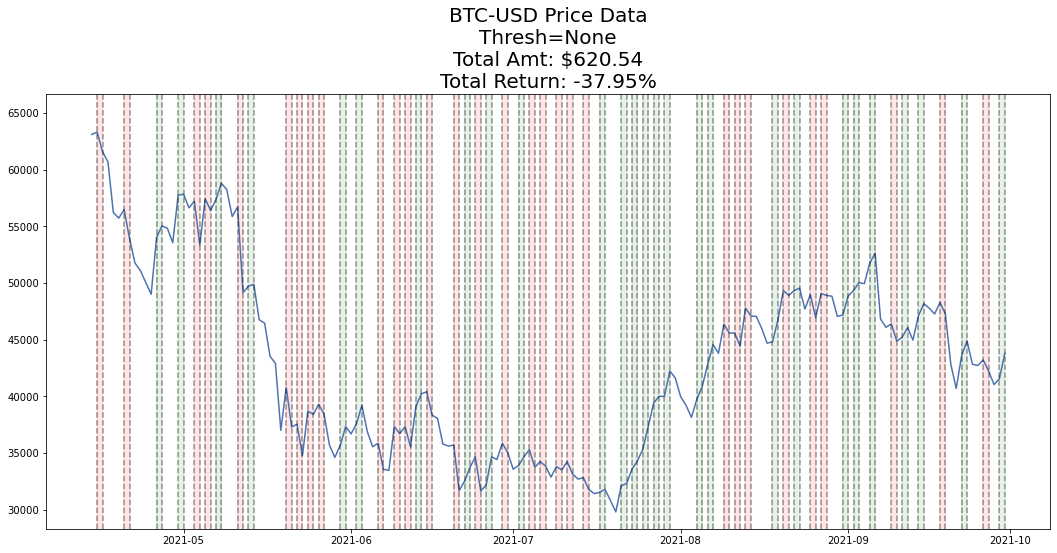

620.5443283485246

In [90]:
run_simulation(returns, prices, 1000, 'last', None, verbose=False)


<span style="color:grey; font-size:1.2em">La technique d'acheter le dernier retour si il est positif est ne fonctionne bien pas pour le bitcoin.</span>

#### Technique: AR(1) Model


<span style="color:grey; font-size:1.2em">chaque jour, nous prévoyons quelle sera la valeur du Bitcoin du jour suivant si ce résultat prédit est supérieur à un seuil que nous spécifions => le bot le fera mais sinon => aucun échange ne sera exécuté</span>

100%|██████████| 169/169 [00:46<00:00,  3.61it/s]


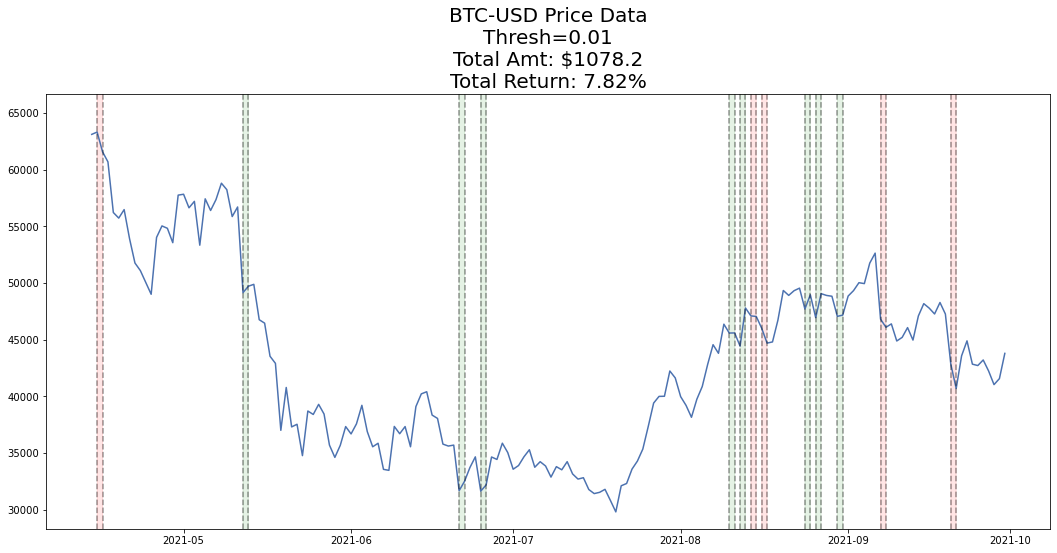

1078.20027349168

In [91]:
run_simulation(returns, prices, 1000, (1,1,1), 0.01, verbose=False)

100%|██████████| 169/169 [00:19<00:00,  8.57it/s]


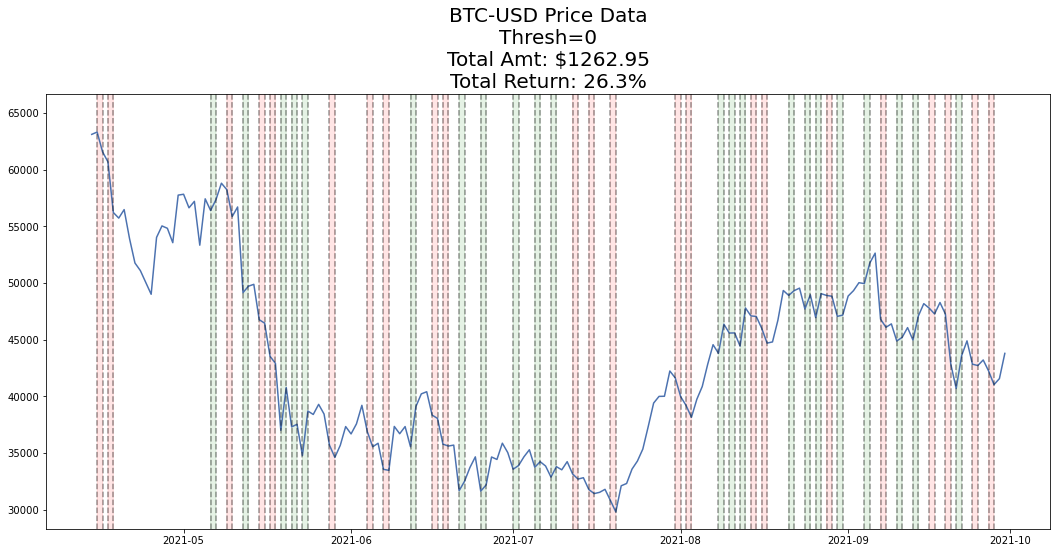

100%|██████████| 169/169 [00:06<00:00, 25.76it/s]


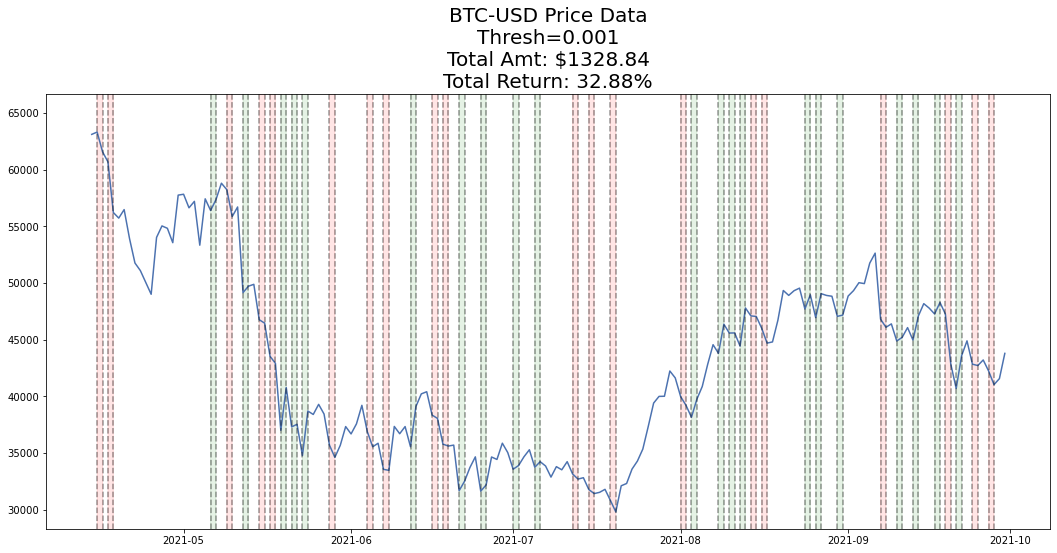

100%|██████████| 169/169 [00:08<00:00, 19.73it/s]


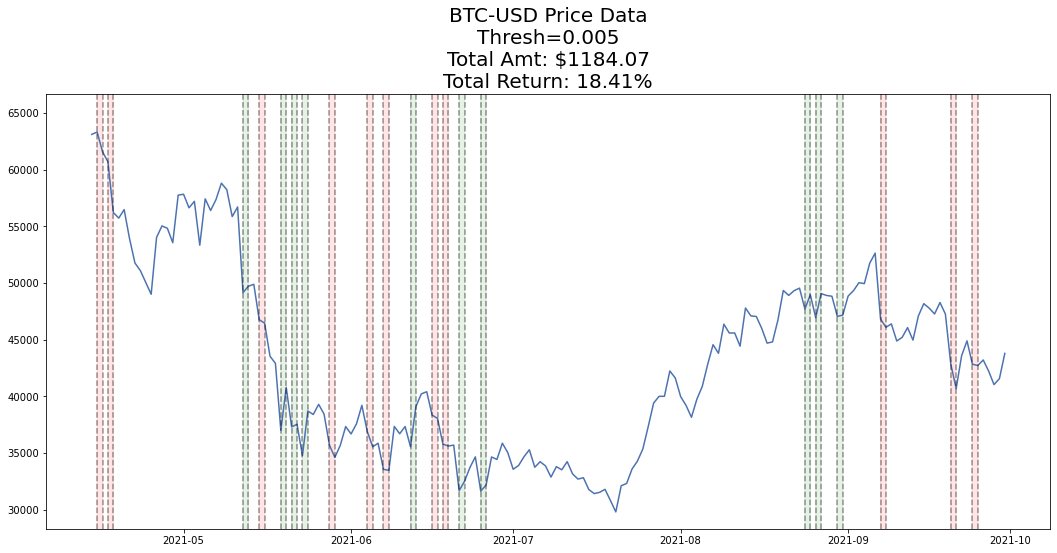

In [92]:
for thresh in [0, 0.001, 0.005]:
    run_simulation(returns, prices, 1000, (1,0,0), thresh, verbose=False)


<span style="color:grey; font-size:1.2em">Le <b>ARIMA(1,0,0)</b> avec un seuil de 0.001 atteint <b>44%</b> de retour ce qui est un <b>résultat exceptionnel</b> 🤑.</span>

### Technique: AR(5) Model


<span style="color:grey; font-size:1.2em">Essayons maintenant un <b>ARIMA(5,0,5)</b> </span>

  2%|▏         | 3/169 [00:00<00:45,  3.64it/s]

Schur decomposition solver error.


  2%|▏         | 4/169 [00:01<00:48,  3.42it/s]

Schur decomposition solver error.


  3%|▎         | 5/169 [00:01<00:49,  3.32it/s]

Schur decomposition solver error.


  4%|▎         | 6/169 [00:01<00:49,  3.26it/s]

Schur decomposition solver error.


100%|██████████| 169/169 [01:58<00:00,  1.43it/s]


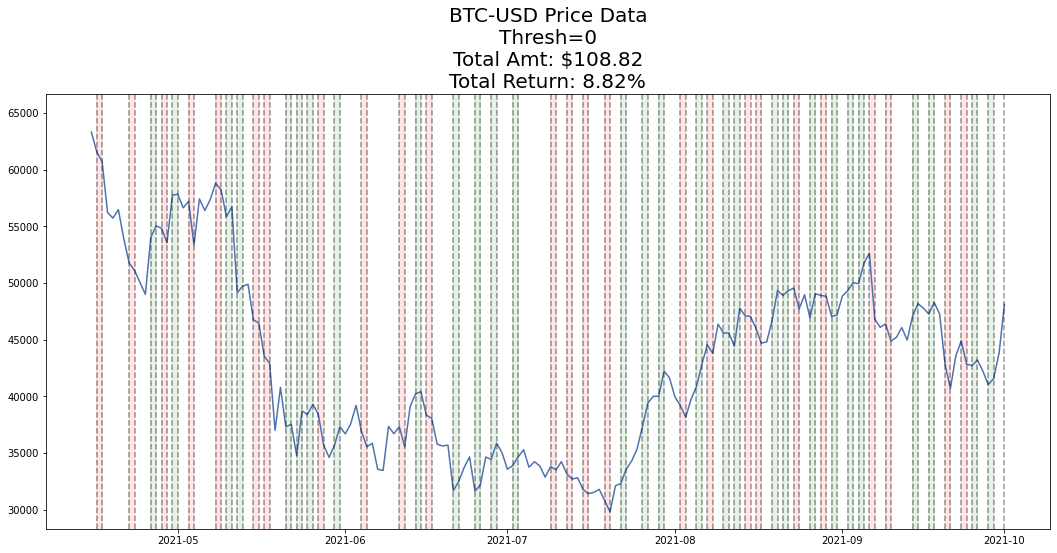

  2%|▏         | 3/169 [00:00<00:45,  3.66it/s]

Schur decomposition solver error.


  2%|▏         | 4/169 [00:01<00:47,  3.47it/s]

Schur decomposition solver error.


  3%|▎         | 5/169 [00:01<00:48,  3.35it/s]

Schur decomposition solver error.


  4%|▎         | 6/169 [00:01<00:49,  3.26it/s]

Schur decomposition solver error.


100%|██████████| 169/169 [02:00<00:00,  1.40it/s]


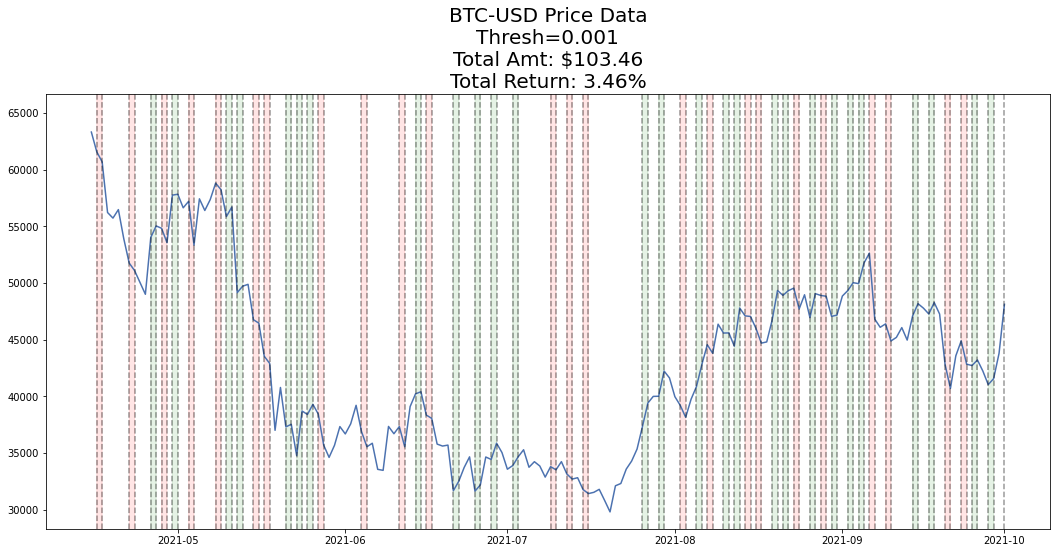

  2%|▏         | 3/169 [00:00<00:44,  3.72it/s]

Schur decomposition solver error.


  2%|▏         | 4/169 [00:01<00:47,  3.50it/s]

Schur decomposition solver error.


  3%|▎         | 5/169 [00:01<00:48,  3.36it/s]

Schur decomposition solver error.


  4%|▎         | 6/169 [00:01<00:49,  3.28it/s]

Schur decomposition solver error.


100%|██████████| 169/169 [02:16<00:00,  1.24it/s]


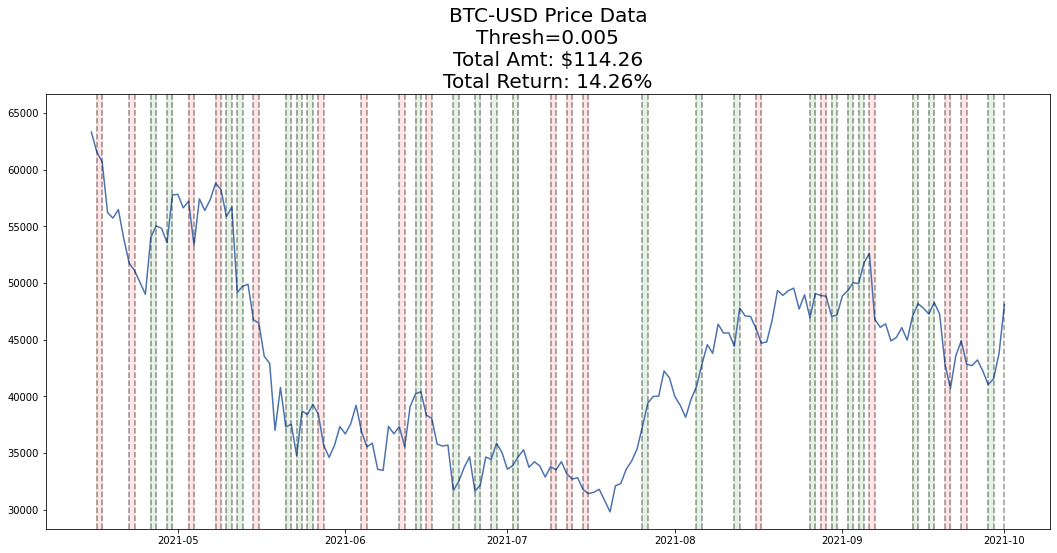

In [97]:
for thresh in [0, 0.001, 0.005]:
    run_simulation(returns, prices, 100, (5,0,5), thresh, verbose=False)

<span style="color:grey; font-size:1.2em">Nous n'avons pas réussi à obtenir un meilleur résultat. Il est possible que nous ayons commencé d'entre dans la phase de "Overfitting"</span>

<div id="binance">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Trading in Binance
        </h3>
</div>



<span style="color:grey; font-size:1.2em"><b>Binance</b> est une plateforme qui permet de stocker, acheter, revendre, et échanger des <b>cryptomonnaies</b> contre d'autres cryptomonnaies mais également contre des monnaies fiduciaires telles que l'Euro2 ou le Dollar.</span>

In [96]:
!pip install python-binance
from binance.client import Client
from binance.exceptions import BinanceAPIException

     -------------------------------------- 65.2/65.2 kB 886.0 kB/s eta 0:00:00
     ------------------------------------ 323.5/323.5 kB 608.3 kB/s eta 0:00:00
     ------------------------------------ 290.5/290.5 kB 448.5 kB/s eta 0:00:00
     ------------------------------------ 101.4/101.4 kB 364.8 kB/s eta 0:00:00
     -------------------------------------- 56.7/56.7 kB 297.7 kB/s eta 0:00:00
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached aiosignal-1.2.0-py3-none-any.whl (8.2 kB)
  Using cached regex-2022.3.2-cp39-cp39-win_amd64.whl (274 kB)
  Attempting uninstall: regex
    Found existing installation: regex 2022.3.15
    Uninstalling regex-2022.3.15:
      Successfully uninstalled regex-2022.3.15


<span style="color:grey; font-size:1.2em">La clé API est un identifiant unique qui authentifie les requêtes associées à votre projet à des fins d'utilisation et de facturation. Vous devez avoir au moins une clé API associée à votre projet</span>

In [99]:
# Entrez votre clé API ici
api_key="API_KEY_HERE"
api_secret="API_SECRET_HERE"

In [100]:
client = Client(api_key,api_secret)

In [101]:
pd.DataFrame(client.get_historical_klines('BTCUSDT','1m','30 m ago UTC')).tail()

0               1               2               3   \
25  1643702100000  38414.36000000  38426.89000000  38407.57000000   
26  1643702160000  38422.08000000  38449.12000000  38416.35000000   
27  1643702220000  38439.51000000  38446.60000000  38431.68000000   
28  1643702280000  38443.83000000  38446.90000000  38433.82000000   
29  1643702340000  38434.02000000  38439.14000000  38432.05000000   

                4           5              6                7    8   \
25  38422.08000000  5.91164000  1643702159999  227094.93168070  337   
26  38439.51000000  8.33217000  1643702219999  320206.31277940  432   
27  38443.83000000  7.79801000  1643702279999  299751.57319570  314   
28  38434.01000000  8.16838000  1643702339999  314003.29277350  313   
29  38433.88000000  2.13736000  1643702399999   82151.18731860  176   

            9                10 11  
25  4.19970000  161329.35863350  0  
26  4.71958000  181384.50943230  0  
27  6.20906000  238675.42153760  0  
28  4.00803000  154071.49661120  0  
29  1.27532000   49017.86610520  0

In [102]:
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol,interval, lookback+' m ago UTC'))
    frame = frame.iloc[:,:6]
    frame.columns = ['Time','Open','High','Low','Close','Volume']
    frame = frame.set_index('Time')
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float)
    return frame


In [103]:
visual_test=getminutedata('BTCUSDT','1m','30')

In [104]:

fig = px.line(visual_test.Open)

fig.update_layout(title='BTC/USD Price',
                   xaxis_title='Time',
                   yaxis_title='Price',
                   plot_bgcolor='white')

fig.show()

#### La Stratégie de notre Trading Bot


<span style="color:grey; font-size:1.2em">Chaque jour, nous prévoyons quelle sera la valeur du <b>Bitcoin</b> du jour suivant. <br>&emsp;&emsp;Si ce résultat prédit est supérieur à un seuil que nous spécifions => <b>Le bot va acheter 💰</b> <br> &emsp;&emsp;Sinon => <b>Aucun échange ne sera exécuté 😴</b></span>

In [105]:

def strategy(symbol, qty, entried=False):
    df = getminutedata(symbol, '1m', '30')
    cumulret = (df.Open.pct_change() + 1).cumprod() - 1
    if not entried:
        if cumulret[-1] < -0.002:
            order = client.create_order(symbol=symbol, side='BUY', type='MARKET', quantity=qty)
            print(order)
            enteried = True
        else:
            print ("Aucune transaction n'a été exécutée")
    if entried:
        while True:
            df = getminutedata(symbol, '1m', '30')
            sincebuy = df.loc[df.index > pd.tp_datetime(order['transactTime'], unit='ms')]
            if len(sincebuy) > 0:
                sincebuyret = (sincebuy.Open.pct_change() + 1).cumprod() - 1
                if sincebuyret[-1] > 0.0015 or sincebuyret[-1] \
                    < -0.0015:
                    order = client.create_order(symbol=symbol,
                            side='SELL', type='MARKET', quantity=qty)
                    print(order)
                    break


<span style="color:grey; font-size:1.2em">Puisqu'on a pas de solde sur mes comptes, nous pouvons pas tester le bot dans le pratique 😟<span>

In [106]:

try:
    strategy('BTCUSDT',0.001)
except BinanceAPIException:
    print("le compte a un solde insuffisant pour l'action demandée.")
except Exception as e:
    print(e)

No trade has been excuted


<center id="Conclusion">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Conclusion 📌
        </h2>
</center>

<div style="color:grey; font-size:1.2em">Le travail que nous avons réalisé a consisté à exploirer le cycle de vie d'un project de Data Science en general et du Deep Learning et des séries chronologiques en particulier. On bien appris comment collecter les données, analyser et transformer les données, dans la partie du Pré-traitement on a diviser les données et adapater nous données, et dernièrement la construction des modèles en essayant différentes approches: Modèles de base, les Réseaux de neurones et les Prévision avec les séries chronologiques. Enfin, On a réalisé des simulations pour evaluer nos modèles ainsi qu'on a connceté un service de Trading Beninace pour effecturer les trades.
<br>
<br>
<span style="color:black; font-size:1.2em; background-color:#FFFFA6">Ce projet nous a permis d'acquérir nouvelles techniques, plusieurs bibliothèques et packages, ainsi qu'un vision plus claire sur le monde de trading et de crypto-monnaie.</span>
</div>